<a href="https://colab.research.google.com/github/helynecheverry/parcial2/blob/main/parcialfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente de la base de datos:
https://www.datos.gov.co/Econom-a-y-Finanzas/PIB-Departamental-con-proyecci-n/kgyi-qc7j/about_data

In [218]:
# Importacion de librerias y herramientas visuales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
import time


In [219]:
 # Ruta de acceso para la base de datos
df= pd.read_csv("https://paste.c-net.org/BeseechCuring")


In [208]:
# isualizacion de los pimeros 100 datos

df.head(100)

,Unnamed: 0,Año,Actividad,Sector,Tipo de precios,Código Departamento (DIVIPOLA),Departamento,Valor (miles de millones de pesos)
0,30,2005,"Agricultura, ganadería, caza, silvicultura y p...",Primario,PIB a precios constantes de 2015,76,Valle del Cauca,3439.32
1,63,2005,Explotación de minas y canteras,Primario,PIB a precios constantes de 2015,76,Valle del Cauca,137.48
2,96,2005,Industrias manufactureras,Secundario,PIB a precios constantes de 2015,76,Valle del Cauca,9262.77
3,129,2005,"Suministro de electricidad, gas, vapor y aire ...",Terciario,PIB a precios constantes de 2015,76,Valle del Cauca,1970.19
4,162,2005,Construcción,Secundario,PIB a precios constantes de 2015,76,Valle del Cauca,2200.06
...,...,...,...,...,...,...,...,...
95,3165,2008,Construcción,Secundario,PIB a precios corrientes,76,Valle del Cauca,2098.48
96,3198,2008,Comercio al por mayor y al por menor; reparaci...,Terciario,PIB a precios corrientes,76,Valle del Cauca,7873.45
97,3231,2008,Información y comunicaciones,Terciario,PIB a precios corrientes,76,Valle del Cauca,1649.88
98,3264,2008,Actividades financieras y de seguros,Terciario,PIB a precios corrientes,76,Valle del Cauca,1486.75


In [209]:
# Muesta los valores unicos del campor seleccionado
df["Actividad"].unique()

array(['Agricultura, ganadería, caza, silvicultura y pesca',
       'Explotación de minas y canteras', 'Industrias manufactureras',
       'Suministro de electricidad, gas, vapor y aire acondicionado; distribución de agua; evacuación y tratamiento de aguas residuales, gestión de desechos y actividades de saneamiento ambiental',
       'Construcción',
       'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas; transporte y almacenamiento; alojamiento y servicios de comida',
       'Información y comunicaciones',
       'Actividades financieras y de seguros',
       'Actividades inmobiliarias',
       'Actividades profesionales, científicas y técnicas; actividades de servicios administrativos y de apoyo',
       'Administración pública y defensa; planes de seguridad social de afiliación obligatoria; educación; actividades de atención de la salud humana y de servicios sociales',
       'Actividades artísticas, de entretenimiento y recreación y otras a

In [203]:
# Muestra el dataframe
df["Actividad"]

,Actividad
0,"Agricultura, ganadería, caza, silvicultura y p..."
1,Explotación de minas y canteras
2,Industrias manufactureras
3,"Suministro de electricidad, gas, vapor y aire ..."
4,Construcción
...,...
489,Actividades inmobiliarias
490,"Actividades profesionales, científicas y técni..."
491,Administración pública y defensa; planes de se...
492,"Actividades artísticas, de entretenimiento y r..."


In [212]:
#filtra actiidad de impuesto y qel PIB del  tipo de precio corriente
df2 = df.loc[df['Actividad'] == 'Impuestos']
df2 = df2.loc[df['Tipo de precios'] == 'PIB a precios corrientes']
df2

,Unnamed: 0,Año,Actividad,Sector,Tipo de precios,Código Departamento (DIVIPOLA),Departamento,Valor (miles de millones de pesos)
25,855,2005,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,2908.40
51,1713,2006,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,3579.06
77,2571,2007,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,4128.42
103,3429,2008,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,4448.52
129,4287,2009,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,4763.37
155,5145,2010,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,5192.72
181,6003,2011,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,5885.02
207,6861,2012,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,6248.40
233,7719,2013,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,6136.39
259,8577,2014,Impuestos,Terciario,PIB a precios corrientes,76,Valle del Cauca,6972.51


In [213]:
# Crea una nueva variable
nombreColumnas = df.columns.values
nombreColumnas

array(['Unnamed: 0', 'Año', 'Actividad', 'Sector', 'Tipo de precios',
       'Código Departamento (DIVIPOLA)', 'Departamento',
       'Valor (miles de millones de pesos)'], dtype=object)

In [221]:
#Tamaño del nuevo df
df2.size

152

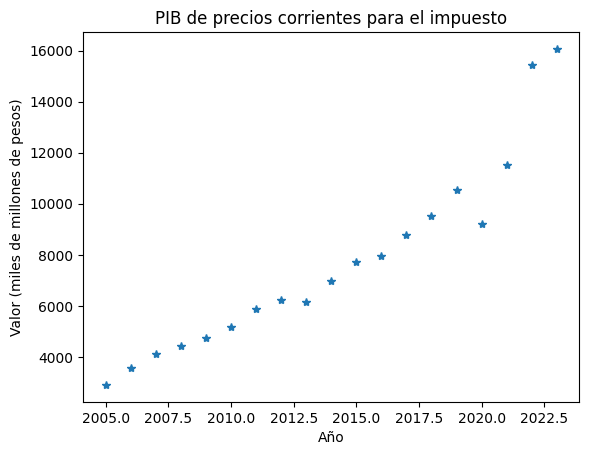

In [222]:
# grafico de disersion entre año y valor en millones
plt.plot(df2[nombreColumnas[1]], df2[nombreColumnas[7]],"*")
plt.title("PIB de precios corrientes para el impuesto")
plt.xlabel(nombreColumnas[1])
plt.ylabel(nombreColumnas[7])
plt.show()

In [182]:
#Visualizacion de 2 columnas
print(df2[nombreColumnas[1]],df2[nombreColumnas[7]])

25     2005
51     2006
77     2007
103    2008
129    2009
155    2010
181    2011
207    2012
233    2013
259    2014
285    2015
311    2016
337    2017
363    2018
389    2019
415    2020
441    2021
467    2022
493    2023
Name: Año, dtype: int64 25      2908.40
51      3579.06
77      4128.42
103     4448.52
129     4763.37
155     5192.72
181     5885.02
207     6248.40
233     6136.39
259     6972.51
285     7710.84
311     7955.89
337     8786.70
363     9516.58
389    10551.36
415     9191.07
441    11522.81
467    15428.48
493    16061.79
Name: Valor (miles de millones de pesos), dtype: float64


In [223]:
# informacion
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 25 to 493
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          19 non-null     int64  
 1   Año                                 19 non-null     int64  
 2   Actividad                           19 non-null     object 
 3   Sector                              19 non-null     object 
 4   Tipo de precios                     19 non-null     object 
 5   Código Departamento (DIVIPOLA)      19 non-null     int64  
 6   Departamento                        19 non-null     object 
 7   Valor (miles de millones de pesos)  19 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ KB


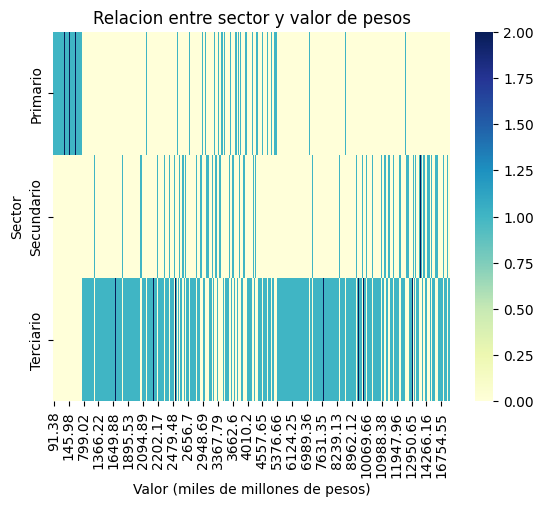

In [224]:
# mapa de calor para relacionar entre dos columnas categoricas.
crosstab = pd.crosstab(df['Sector'], df[nombreColumnas[7]])
sns.heatmap(crosstab, cmap="YlGnBu", annot=False)
plt.title("Relacion entre sector y valor de pesos")
plt.show()

In [183]:
# extraer x/y
x= df2[[nombreColumnas[1]]].values.reshape(-1,1)
y= df2[nombreColumnas[7]].values.reshape(-1,1)

In [225]:
x.shape, y.shape

((19, 1), (19, 1))

In [185]:
#Separar Train / Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [186]:
x_train.size

15

In [187]:
#creae un modelo
from sklearn.linear_model import LinearRegression

In [188]:
# Modifica la dimension de los datos
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)


In [189]:
# entrenar el modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [190]:
x_train

array([[2019],
       [2021],
       [2011],
       [2009],
       [2007],
       [2010],
       [2018],
       [2014],
       [2012],
       [2022],
       [2016],
       [2008],
       [2005],
       [2020],
       [2017]])

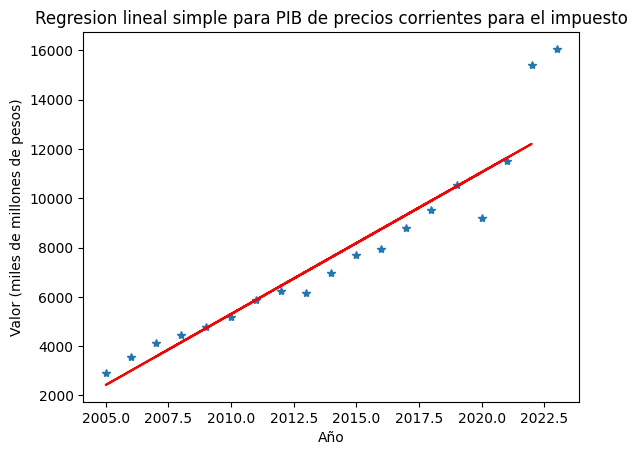

In [200]:
#Regresion lineal

plt.plot(df2[nombreColumnas[1]], df2[nombreColumnas[7]],"*")
plt.plot(x_train, modelo.predict(x_train), color='red');
plt.title("Regresion lineal simple para PIB de precios corrientes para el impuesto")
plt.xlabel(nombreColumnas[1])
plt.ylabel(nombreColumnas[7])
#ax.tick_params(axis="x", rotation=90)
plt.show()

In [193]:
#realizar predicciones
y_pred = modelo.predict(x_test)

In [194]:
# evaluacion
pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()})

,y_test,y_pred
0,7710.84,8180.530404
1,3579.06,3001.195749
2,6136.39,7029.567147
3,16061.79,12784.383430


In [217]:
# Mide el porcentaje de acierto
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8618498536286152

In [226]:
#Prediccion para el año 2030 del PIB de precios corrientes en miles de millones de pesos
modelo.predict([[2026]])

array([[14510.82831494]])